# Content Based Recommendations System

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [34]:
songs = pd.read_csv("tracks_features.csv")
songs.head(4)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.1630,0.000004,0.121,0.574,96.752,213640,4.0,1999,1999-11-02


In [35]:
songs.shape
songs.isna().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

In [73]:
viz_songs=songs.drop(columns=['id', 'album', 'album_id', 'artist_ids', 'name', 'artists', 'track_number', 'disc_number',	'explicit', 'release_date', 'year'])
viz_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cat
0,0.470,0.978,0.636364,0.812104,1.0,0.075026,0.026205,0.000011,0.3560,0.503,0.473644,0.034510,0.8,0.636364
1,0.599,0.957,1.000000,0.806675,1.0,0.194014,0.012952,0.000071,0.1550,0.489,0.416496,0.033861,0.8,0.636364
2,0.315,0.970,0.636364,0.811732,1.0,0.498452,0.023494,0.000002,0.1220,0.370,0.601561,0.049157,0.8,0.727273
3,0.440,0.967,1.000000,0.805694,0.0,0.244582,0.163655,0.000004,0.1210,0.574,0.388665,0.035089,0.8,0.636364
4,0.426,0.929,0.181818,0.792322,1.0,0.072343,0.001627,0.105000,0.0789,0.539,0.510412,0.033762,0.8,0.636364


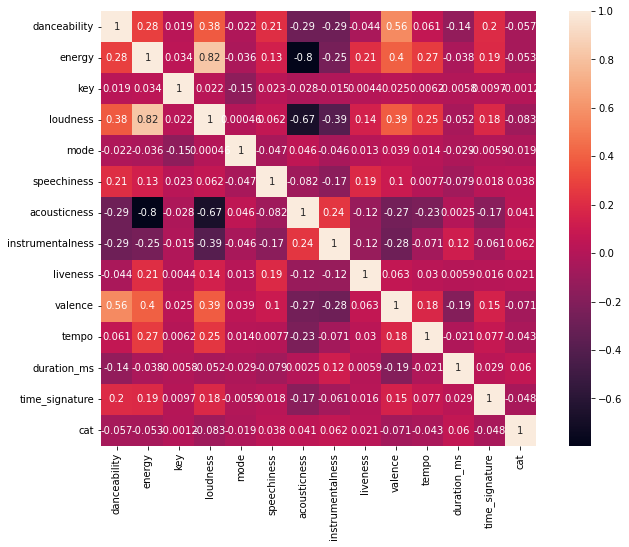

In [74]:
#EDA
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_songs.corr(), annot=True, square=True)
plt.show()

In [75]:
def normalize_column(col):
    songs[col] = (songs[col] - songs[col].min()) / (songs[col].max() - songs[col].min())    

num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = songs.select_dtypes(include=num_types)

for col in num.columns:
  normalize_column(col)
# songs.head(3)

num_2 = viz_songs.select_dtypes(include=num_types)

for col in num_2.columns:
  normalize_column(col)
viz_songs.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cat
0,0.470,0.978,0.636364,0.812104,1.0,0.075026,0.026205,0.000011,0.3560,0.503,0.473644,0.034510,0.8,0.636364
1,0.599,0.957,1.000000,0.806675,1.0,0.194014,0.012952,0.000071,0.1550,0.489,0.416496,0.033861,0.8,0.636364
2,0.315,0.970,0.636364,0.811732,1.0,0.498452,0.023494,0.000002,0.1220,0.370,0.601561,0.049157,0.8,0.727273
3,0.440,0.967,1.000000,0.805694,0.0,0.244582,0.163655,0.000004,0.1210,0.574,0.388665,0.035089,0.8,0.636364
4,0.426,0.929,0.181818,0.792322,1.0,0.072343,0.001627,0.105000,0.0789,0.539,0.510412,0.033762,0.8,0.636364


In [76]:
#K-Means clustering for genre classification
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12)
cat = km.fit_predict(num)
songs['cat'] = cat
normalize_column('cat')

In [79]:
songs.cat[:10]
# print(viz_songs.loc[viz_songs['id']=='7lmeHLHBe4nmXzuXc0HDjk'].shape)

0    0.363636
1    0.363636
2    0.363636
3    0.181818
4    0.818182
5    0.818182
6    0.363636
7    0.181818
8    0.363636
9    0.363636
Name: cat, dtype: float64

In [91]:
#finds song ID i.e index of song in the csv
def find_songId(title):
    song_id=songs.loc[songs["id"]==title].index[0]
    return song_id

def find_songVector(title):
    # song_id=find_songId(title)
    print("hello")
    print(viz_songs.loc[songs['id']==title])
    
    return viz_songs.loc[songs['id']==title]
#finds reccomendations using a given song title
def find_recommendations(title):
    
    print(find_songId(title))
    song_vec=find_songVector(title)
    print("bye")
    sim=cosine_similarity(viz_songs,song_vec)
    print("SHAPE ")
    print(sim.shape)
    scores=list(enumerate(sim))
    sorted_scores=sorted(scores,key=lambda x:x[1],reverse=True)  #sorts all the songs in the list in reverse order (decreasing order)
    sorted_scores=sorted_scores[1:]                               #skips the first index as it is the same song with highest similarity
    # print(len(sorted_scores))
    # print(scores)
    rec_songs=[]
    for i in range(0,5):
        indx=sorted_scores[i][0]
        print(sorted_scores[i])
        rec_songs.append(songs.loc[indx]["name"]+" by "+songs.loc[indx]["artists"])       #adds all song title according to the scores found
    return rec_songs #returns the songs


find_recommendations('7lmeHLHBe4nmXzuXc0HDjk')

0
hello
   danceability  energy       key  loudness  mode  speechiness  acousticness  \
0          0.47   0.978  0.636364  0.812104   1.0     0.075026      0.026205   

   instrumentalness  liveness  valence     tempo  duration_ms  time_signature  \
0          0.000011     0.356    0.503  0.473644      0.03451             0.8   

        cat  
0  0.636364  
bye
SHAPE 
(1204025, 1)
(39200, array([0.99973292]))
(88612, array([0.99952695]))
(1140153, array([0.99944541]))
(869326, array([0.99939752]))
(1152767, array([0.99936072]))


["Daily Revolver by ['Record Thieves']",
 "Digital On by ['Neve']",
 "New Life by ['Killers Lodge']",
 "Sleeping Somewhere Else by ['The Slow Death']",
 "Ride On Baby by ['Tommy Keene']"]

In [84]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    # num_types = ['string']
    # non_num_col=songs.select_dtypes(include=num_types)

    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [3, 8, 14,16]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [85]:
recommender = SpotifyRecommender(songs)

In [89]:
recommender.get_recommendations("7lmeHLHBe4nmXzuXc0HDjk", 5)

  0%|          | 0/1204025 [00:00<?, ?it/s]


ValueError: could not convert string to float: '7lmeHLHBe4nmXzuXc0HDjk'